# Dynamic Model of Quadrotor with Suspended Load (3D)

OBS:

* This document does not cover the rotational dynamics, since it's the same of the quadrotor

* There is a summary at the end

## Common Setup

In [12]:
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, vprint, vpprint, vlatex
from IPython.display import display

init_vprinting()

# Time and input variables
t, u = symbols('t u')

# Physical parameters
m, M, l, g = symbols('m M l g')

# Euler angles
phi, theta, psi = dynamicsymbols('\phi \ttheta \psi')

# Cable angles
phiL, thetaL = dynamicsymbols('\phi_L \ttheta_L')

# Angular Velocities
phidot = diff(phi, t)
thetadot = diff(theta, t)
psidot = diff(psi, t)

phiLdot = diff(phiL, t)
thetaLdot = diff(thetaL, t)

# Angular Accelerations
phiddot = diff(phidot, t)
thetaddot = diff(thetadot, t)
psiddot = diff(psidot, t)

phiLddot = diff(phiLdot, t)
thetaLddot = diff(thetaLdot, t)

# Auxiliary variables
ux, uy, uz = symbols('u_x u_y u_z');
# ux = cos(phi)*sin(theta)*cos(psi) + sin(phi)*sin(psi)
# uy = cos(phi)*sin(theta)*sin(psi) - sin(phi)*cos(psi)
# uz = cos(phi)*cos(theta)


## Coordinates $(x,y,z,\phi_L,\theta_L)$

In [13]:
# Quadrotor position
x, y, z = dynamicsymbols('x y z')

# Quadrotor velocity
xdot = diff(x, t)
ydot = diff(y, t)
zdot = diff(z, t)

# Quadrotor acceleration
xddot = diff(xdot, t)
yddot = diff(ydot, t)
zddot = diff(zdot, t)

# Load position
xL = x - l*sin(thetaL)
yL = y + l*sin(phiL)*cos(thetaL)
zL = z - l*cos(phiL)*cos(thetaL)

# Load Velocity
xLdot = diff(xL, t)
yLdot = diff(yL, t)
zLdot = diff(zL, t)

# Load Accleration
xLddot = diff(xLdot, t)
yLddot = diff(yLdot, t)
zLddot = diff(zLdot, t)

print('LOAD VELOCITIES:')
display(simplify(xLdot),simplify(yLdot),simplify(zLdot))

print('LOAD ACCELERATIONS:')
display(simplify(xLddot),simplify(yLddot),simplify(zLddot))


LOAD VELOCITIES:


LOAD ACCELERATIONS:


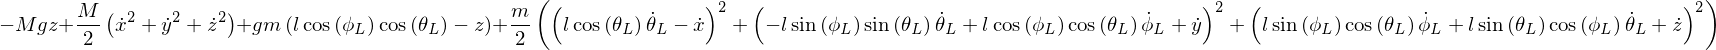

In [14]:
T = M/2*(xdot**2 + ydot**2 + zdot**2) + m/2*(xLdot**2 + yLdot**2 + zLdot**2)
V = M*g*z + m*g*zL
L = T-V
simplify(L)

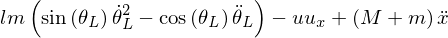

In [15]:
eqX = expand(diff(diff(L,xdot),t) - diff(L,x) - ux*u)
eqX = collect(collect(eqX,xddot),m*l)
eqX

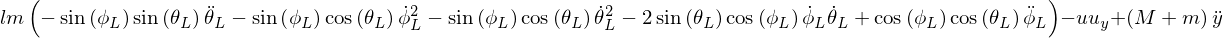

In [16]:
eqY = expand(diff(diff(L,ydot),t) - diff(L,y)-uy*u)
eqY = collect(collect(eqY,yddot),m*l)
eqY

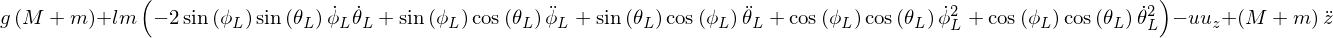

In [17]:
eqZ = expand(diff(diff(L,zdot),t) - diff(L,z)-uz*u)
eqZ = collect(collect(collect(eqZ,zddot),g),m*l)
eqZ

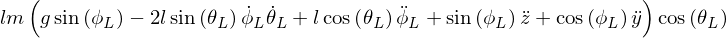

In [18]:
eqPhiL = simplify(diff(diff(L,phiLdot),t) - diff(L,phiL))
eqPhiL

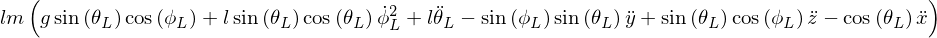

In [19]:
eqThetaL = simplify(diff(diff(L,thetaLdot),t) - diff(L,thetaL))
eqThetaL = collect(eqThetaL,zddot)
eqThetaL = collect(eqThetaL,yddot)
eqThetaL = collect(eqThetaL,g)
eqThetaL = expand_trig(eqThetaL)
eqThetaL

### Dynamic Model $(x,y,z,\phi_L,\theta_L)$

$$
\begin{align}
(M+m)\,\ddot{x} + ml\left(-\cos{\theta_L}\,\ddot{\theta_L} + \sin{\theta_L}\,\dot{\theta_L}^2 \right) &= u_x\,u_1 \\
(M+m)\,\ddot{y} + ml\left[\cos{\theta_L}\left(\cos{\phi_L}\,\ddot{\phi_L} - \sin{\phi_L}\,\dot{\phi_L}^2\right) -\sin{\phi_L}\left( \sin{\theta_L}\,\ddot{\theta_L} + \cos{\theta_L}\,\dot{\theta_L}^2 \right) -2\cos{\phi_L}\sin{\theta_L}\dot{\phi_L}\dot{\theta_L} \right]  &= u_y\,u_1 \\
(M+m)\,\ddot{z} + (M+m)g + ml\left[\cos{\theta_L}\left(\sin{\phi_L}\,\ddot{\phi_L} + \cos{\phi_L}\,\dot{\phi_L}^2\right) +\cos{\phi_L}\left( \sin{\theta_L}\,\ddot{\theta_L} + \cos{\theta_L}\,\dot{\theta_L}^2 \right) -2\sin{\phi_L}\sin{\theta_L}\dot{\phi_L}\dot{\theta_L} \right] &= u_z\,u_1 \\
ml\cos{\theta_L} \left( \cos{\phi_L}\,\ddot{y} + \sin{\phi_L}\,\ddot{z} +l\cos{\theta_L}\ddot{\phi_L} -2l\sin{\theta_L}\dot{\phi_L}\dot{\theta_L} + g\sin{\phi_L} \right) &= 0 \\
ml\left( -\cos{\theta_L}\,\ddot{x} - \sin{\phi_L}\sin{\theta_L}\,\ddot{y} + \cos{\phi_L}\sin{\theta_L}\,\ddot{z} +l\ddot{\theta_L} + l\sin{\theta_L}\cos{\theta_L}\dot{\phi_L}^2 + g\cos{\phi_L}\sin{\theta_L} \right) &= 0
\end{align}
$$ 

#### Matrix Form

$$
M(q) = 
\begin{bmatrix}
    (M+m)             & 0                             & 0                             & 0                             & -ml\cos{\theta_L} \\
    0                 & (M+m)                         & 0                             & ml\cos{\phi_L}\cos{\theta_L}  & -ml\sin{\phi_L}\sin{\theta_L} \\
    0                 & 0                             & (M+m)                         & ml\sin{\phi_L}\cos{\theta_L}  & ml\cos{\phi_L}\sin{\theta_L} \\
    0                 & ml\cos{\phi_L}\cos{\theta_L}  & ml\sin{\phi_L}\cos{\theta_L}  & ml^2\cos^2{\theta_L}          & 0 \\
    -ml\cos{\theta_L}  & -ml\sin{\phi_L}\sin{\theta_L} & ml\cos{\phi_L}\sin{\theta_L}  &                               & ml^2
\end{bmatrix}\\[50pt]
$$

$$
C(q,\dot{q}) = 
\begin{bmatrix}
    0 & 0 & 0 & 0                                                &  ml\sin{\theta_L}\dot{\theta_L}\\
    0 & 0 & 0 & -ml\left(\sin{\phi_L}\cos{\theta_L}\dot{\phi_L} + \cos{\phi_L}\sin{\theta_L}\dot{\theta_L}\right)        & -ml\left(\sin{\phi_L}\cos{\theta_L}\dot{\theta_L} + \cos{\phi_L}\sin{\theta_L}\dot{\phi_L}\right)   \\
    0 & 0 & 0 &  ml\left(\cos{\phi_L}\cos{\theta_L}\dot{\phi_L} - \sin{\phi_L}\sin{\theta_L}\dot{\theta_L}\right)        &  ml\left(\cos{\phi_L}\cos{\theta_L}\dot{\theta_L} - \sin{\phi_L}\sin{\theta_L}\dot{\phi_L}\right)   \\
    0 & 0 & 0 & -ml^2\sin{\theta_L}\cos{\theta_L}\dot{\theta_L}^*  & -ml^2\sin{\theta_L}\cos{\theta_L}\dot{\phi_L}^* \\
    0 & 0 & 0 &  ml^2\sin{\theta_L}\cos{\theta_L}\dot{\phi_L}^*    & 0
\end{bmatrix} \\[40pt]
\text{*} \sin{\theta_L}\cos{\theta_L} = \frac{1}{2}\sin{2\theta_L}\\[10pt]
$$

$$
G(q) = 
\begin{bmatrix}
0 \\
0 \\
(M+m)g \\
mgl\sin{\phi_L}\cos{\theta_L} \\
mgl\cos{\phi_L}\sin{\theta_L}
\end{bmatrix}\\[40pt]
$$

$$
B(q) = 
\begin{bmatrix}
u_x \\
u_y \\
u_z \\
0 \\
0
\end{bmatrix}
=
\begin{bmatrix}
cos(\phi)sin(\theta)cos(\psi) + sin(\phi)sin(\psi) \\
cos(\phi)sin(\theta)sin(\psi) - sin(\phi)cos(\psi) \\
cos(\phi)cos(\theta) \\
0 \\
0
\end{bmatrix}\\[40pt]
$$

$$
M(q)\,\ddot{q} + C(q,\dot{q})\,\dot{q} + G(q) = B(q)\,u
$$

In [20]:
res = solve([eqX,eqY,eqZ,eqPhiL,eqThetaL],[xddot,yddot,zddot,phiLddot,thetaLddot])

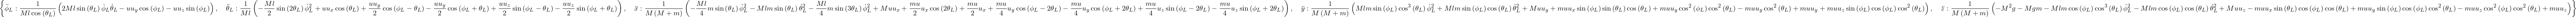

In [21]:
res

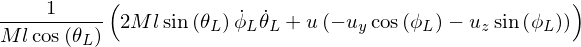

In [22]:
phiLddot_expr = res[phiLddot]
#phiLddot_expr = phiLddot_expr.subs([(uy,cos(phi)*sin(theta)*sin(psi)-sin(phi)*cos(psi)),(uz,cos(phi)*cos(theta))])
phiLddot_expr = simplify(phiLddot_expr)
phiLddot_expr = collect(phiLddot_expr,u)
phiLddot_expr

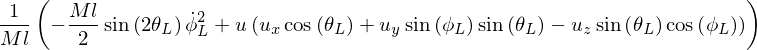

In [26]:
thetaLddot_expr = res[thetaLddot]
thetaLddot_expr = simplify(expand_trig(thetaLddot_expr))
#thetaLddot = thetaLddot_expr.subs([(ux,cos(phi)*sin(theta)*cos(psi)+sin(phi)*sin(psi)), (uy,cos(phi)*sin(theta)*sin(psi)-sin(phi)*cos(psi)),(uz,cos(phi)*cos(theta))])
thetaLddot_expr = simplify(collect(thetaLddot_expr,u))
thetaLddot_expr

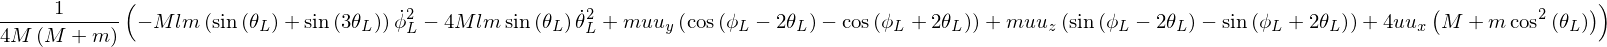

In [27]:
xddot_expr = res[xddot]
xddot_expr = collect(xddot_expr,phiLdot**2)
xddot_expr = collect(xddot_expr,u*ux)
xddot_expr = collect(xddot_expr,u*uy)
xddot_expr = collect(xddot_expr,u*uz)
xddot_expr = simplify(xddot_expr)
xddot_expr

In [233]:
simplify(expand_trig(sin(theta)+sin(3*theta)))

In [202]:
expand_trig(cos(phi-2*theta)-cos(phi+2*theta))

In [203]:
expand_trig(sin(phi-2*theta)-sin(phi+2*theta))

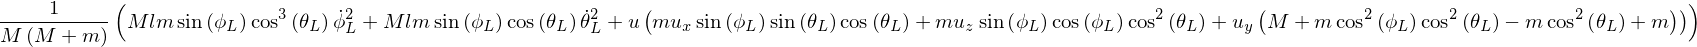

In [28]:
yddot_expr = res[yddot]
yddot_expr = collect(yddot_expr,u*ux)
yddot_expr = collect(yddot_expr,u*uy)
yddot_expr = collect(yddot_expr,u*uz)
yddot_expr = collect(yddot_expr,u)
yddot_expr

In [221]:
trigsimp(cos(phi)**2*cos(theta)**2-cos(theta)**2)

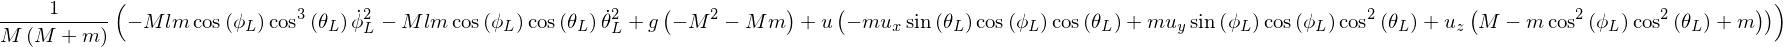

In [29]:
zddot_expr = res[zddot]
zddot_expr = collect(zddot_expr,g)
zddot_expr = collect(zddot_expr,u*ux)
zddot_expr = collect(zddot_expr,u*uy)
zddot_expr = collect(zddot_expr,u*uz)
zddot_expr = collect(zddot_expr,u)
zddot_expr